<a href="https://colab.research.google.com/github/RutujaBedve/Brain-Booster-Analyzer/blob/main/House_Price_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction using Linear Regression

**Internship Project**

This project aims to predict house prices based on features such as size, number of rooms, and location using a Linear Regression model.


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


STEP 1: LOAD THE DATASET

In [12]:
# Load the dataset
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


STEP 2: BASIC DATA CHECK

In [13]:
# Basic information about the dataset
print(data.shape)
data.info()


(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


STEP 3: CHECK MISSING VALUES

In [14]:
data.isnull().sum()


,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


STEP 4: SELECT ONLY USEFUL COLUMNS

In [15]:
data = data[['location', 'size', 'total_sqft', 'bath', 'price']]
data.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


STEP 5: CLEAN THE DATA

In [16]:
#REMOVE MISSING VALUES
data = data.dropna()

#CONVERT SIZE TO NUMBER OF ROOMS(BHK)
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data = data.drop('size', axis=1)

#CONVERT SQFT TO NUMERIC
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')
data = data.dropna()
data.isnull().sum()


,0
location,0
total_sqft,0
bath,0
price,0
bhk,0


STEP 6: ENCODE LOCATION

In [17]:
# Convert location into numerical values
data = pd.get_dummies(data, columns=['location'], drop_first=True)

STEP 7: DEFINE X AND Y

In [18]:
# Features and target
X = data.drop('price', axis=1)
y = data['price']

STEP 8: TRAIN-TEST_SPLIT

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STEP 9: TRAIN LINEAR REGRESSION MODEL

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

STEP 10: PREDICTIONS + EVALUTION

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 46.12170494444572
RMSE: 135.12420166377765
R2 Score: 0.3889656087911897


STEP 11: VISUALIZATION

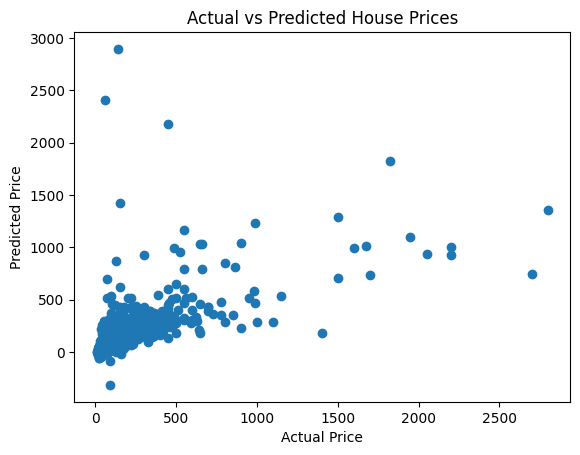

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Conclusion

In this project, a Linear Regression model was developed to predict house prices based on features such as total square footage, number of rooms, bathrooms, and location.

The model achieved reasonable baseline performance, demonstrating the relationship between selected features and house prices. While prediction accuracy is limited due to non-linear patterns and outliers in the dataset, the model serves as a strong foundational approach. Performance can be further improved using advanced regression techniques and feature engineering.
